In [0]:
!pip install sqlalchemy
!pip install psycopg2
!pip install psycopg2-binary

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import math
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings



# import warnings
warnings.filterwarnings('ignore')

In [0]:
# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df= pd.read_sql_query('select * from houseprices', con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [0]:
#explore the dataset
df

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [0]:
#checking for null values
df.isnull().sum()

id                 0
mssubclass         0
mszoning           0
lotfrontage      259
lotarea            0
                ... 
mosold             0
yrsold             0
saletype           0
salecondition      0
saleprice          0
Length: 81, dtype: int64

In [0]:
#describe the data
df.describe()


,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
 differentiating numeric and non-numeric columns

In [0]:
#non_ numerical comumns
non_numeric_columns=df.select_dtypes(["object"]).columns
print(non_numeric_columns)
print("The number of non-numeric columns is {}".format(len(non_numeric_columns)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
The number of non-numeric columns is 43


numeric_columns=df.select_dtypes(["int64","float64"]).columns
print(numeric_columns)

In [0]:
numeric_columns=df.select_dtypes(["int64","float64"]).columns
print(numeric_columns)
print("The number of numeric columns is {}".format(len(numeric_columns)))

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
The number of numeric columns is 38


Dealing with missing values

In [0]:
total_of_missing=df.isnull().sum().sort_values(ascending=False)
percent_of_missing=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_info=pd.concat([total_of_missing,percent_of_missing], axis=1, keys=['Total', 'Percent'])
missing_info.head(30)

,Total,Percent
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
lotfrontage,259,0.177397
garagecond,81,0.055479
garagetype,81,0.055479
garageyrblt,81,0.055479
garagefinish,81,0.055479


In [0]:
#Exploratory Data Analysis. Looking at the larget variable

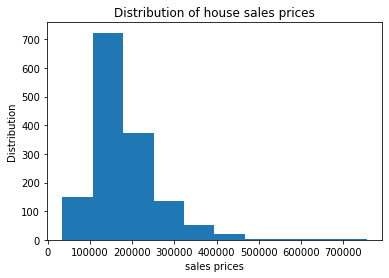

In [0]:
plt.hist(df.saleprice)
plt.title("Distribution of house sales prices")
plt.xlabel("sales prices")
plt.ylabel("Distribution")
plt.show()

In [0]:
#correlation matrix

In [0]:
print(df.corr())

                     id  mssubclass  lotfrontage   lotarea  overallqual  \
id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
mssubclass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
lotfrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
lotarea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
overallqual   -0.028365    0.032628     0.251646  0.105806     1.000000   
overallcond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
yearbuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
yearremodadd  -0.021998    0.040581     0.088866  0.013788     0.550684   
masvnrarea    -0.050298    0.022936     0.193458  0.104160     0.411876   
bsmtfinsf1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
bsmtfinsf2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
bsmtunfsf     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
totalbsmtsf   -0.015415  

In [0]:
# relationship between sale price and other variables
#finding the features that are most closely related to salesprice
#this only applies to numeric columns

In [0]:
np.abs(df[numeric_columns].iloc[:,1:].corr().loc[:,"saleprice"]).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: saleprice, dtype: float64

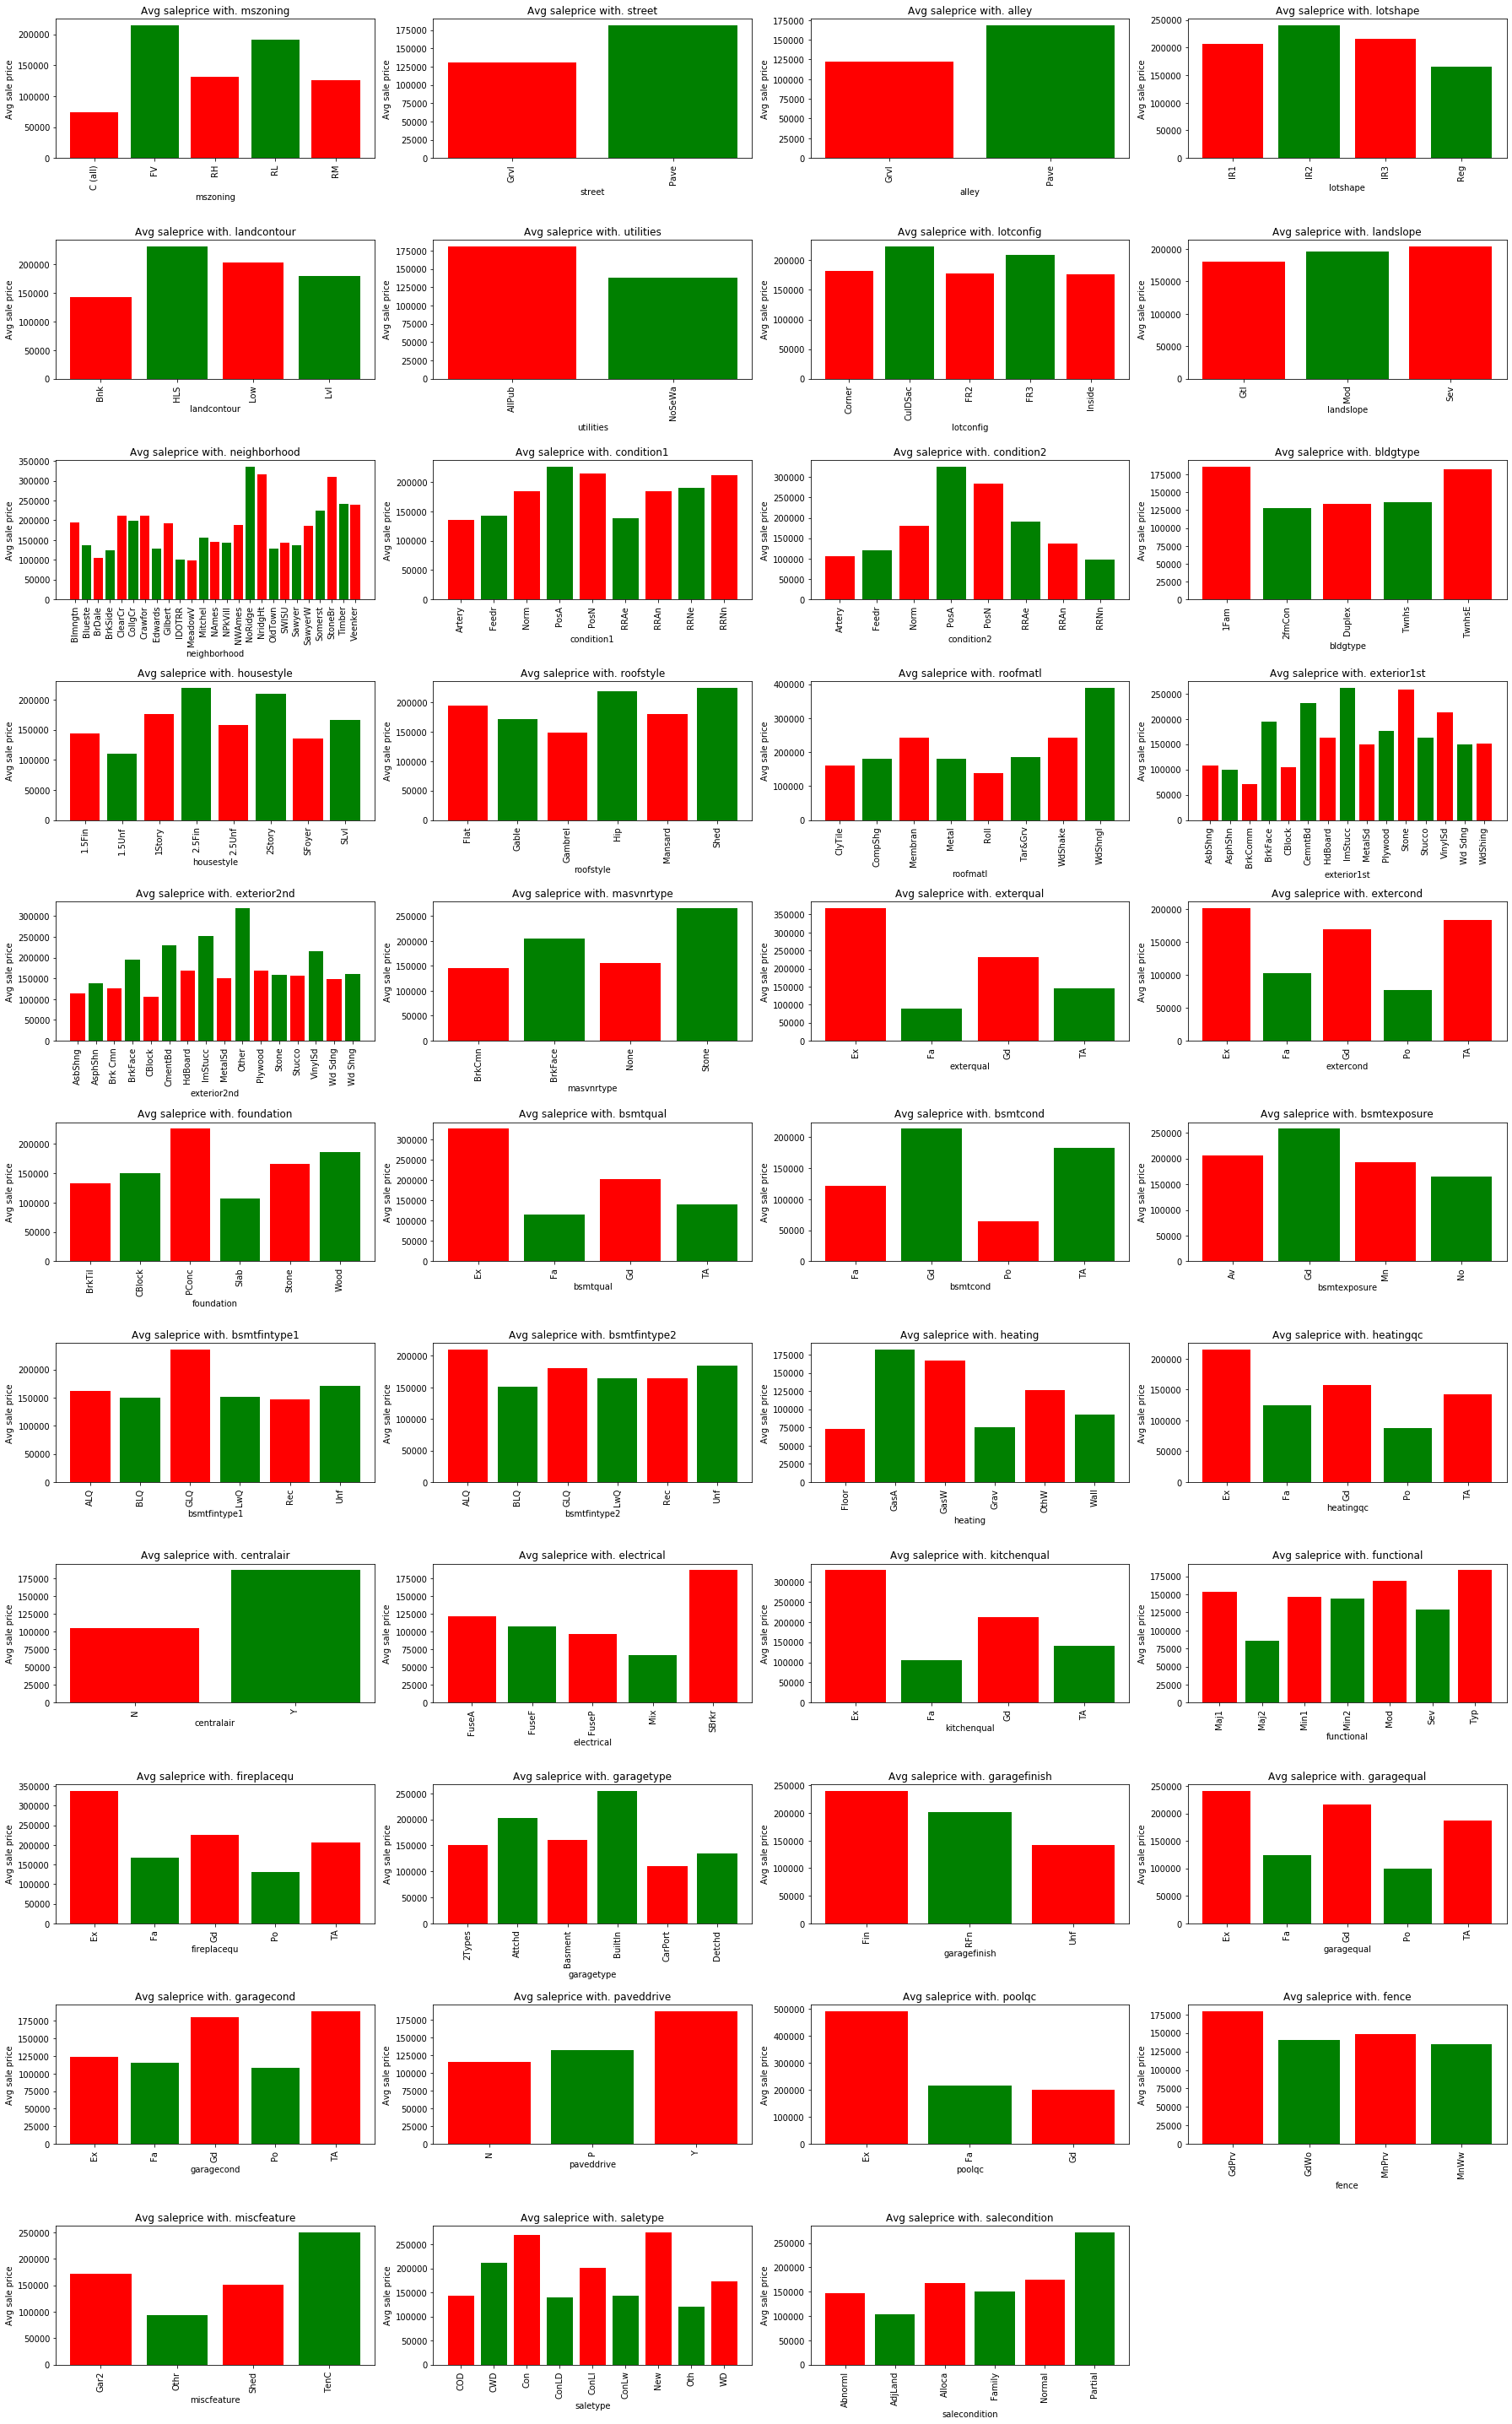

In [0]:
#plot each feature against the varable for univariate analysis
plt.figure(figsize=(25,40))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(11,4, index+1)
    plt.bar(df.groupby(column)["saleprice"].mean().index, df.groupby(column)["saleprice"].mean(),
            color=("red","green"))
    plt.title("Avg saleprice with. {}".format(column))
    plt.ylabel("Avg sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [0]:
# non_numeric features Chosen: mszoning and street
#numeric features chosen:overallqual, grlivarea ,garagecars,garagearea, totalbsmtsf


Regression Model

In [0]:
df=pd.concat([df,pd.get_dummies(df.mszoning,prefix="mszoning",drop_first=True)], axis=1)
df=pd.concat([df,pd.get_dummies(df.street,prefix="street",drop_first=True)], axis=1)
dummy_column_names=list(pd.get_dummies(df.mszoning,prefix="mszoning",drop_first=True).columns)
dummy_column_names=dummy_column_names + list(pd.get_dummies(df.street,prefix="street",drop_first=True).columns)

In [0]:
X=df[["overallqual", "grlivarea" ,"garagecars","garagearea", "totalbsmtsf"] + dummy_column_names]
Y=df.saleprice

In [0]:
import statsmodels.api as sm
X=sm.add_constant(X)
results=sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.0
Date:                Tue, 17 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:10:24   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.173e+05    1.8e+04     -6.502      0.000   -1.53e+05   -8.19e+04
overallqual  2.333e+04   1088.506     21.430      0.000    2.12e+04    2.55e+04
grlivarea      45.6344      2.468     18.494      0.000      40.794      50.475
garagecars   1.345e+04   2990.453      4.498      0.000    7584.056    1.93e+04
garagearea     16.4082     10.402      1.577      0.115      -3.997      36.813
totalbsmtsf    28.3816      2.931      9.684      0.000      22.633      34.131
mszoning_FV  8362.5046   4562.459      1.833      0.067    -587.226    1.73e+04
mszoning_FV  8362.5046   4562.459      1.833      0.067    -587.226    1.73e+04
mszoning_FV  8362.5046   4562.459      1.833      0.067    -587.226    1.73e+04
mszoning_RH  4473.4855   5282.272      0.847      0.397   -5888.232    1.48e+04
mszoning_RH  4473.4855   5282.272      0.847      0.397   -5888.232    1.48e+04
mszoning_RH  4473.4855   5282.272      0.847      0.397   -5888.232    1.48e+04
mszoning_RL  9521.9520   4240.253      2.246      0.025    1204.261    1.78e+04
mszoning_RL  9521.9520   4240.253      2.246      0.025    1204.261    1.78e+04
mszoning_RL  9521.9520   4240.253      2.246      0.025    1204.261    1.78e+04
mszoning_RM  3015.9298   4296.911      0.702      0.483   -5412.902    1.14e+04
mszoning_RM  3015.9298   4296.911      0.702      0.483   -5412.902    1.14e+04
mszoning_RM  3015.9298   4296.911      0.702      0.483   -5412.902    1.14e+04
street_Pave    50.3459   5430.500      0.009      0.993   -1.06e+04    1.07e+04
street_Pave    50.3459   5430.500      0.009      0.993   -1.06e+04    1.07e+04
street_Pave    50.3459   5430.500      0.009      0.993   -1.06e+04    1.07e+04
==============================================================================
Omnibus:                      415.883   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41281.526
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                      29.049   Cond. No.                     3.50e+36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.77e-64. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""